In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
from sklearn.naive_bayes import GaussianNB
from sklearn import svm

In [4]:
import warnings
import pickle
from scipy import stats
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')

In [5]:
df = pd.read_csv("C:/Users/Jayalakshmi/Documents/CSV files/NMCancerProj/incd.csv")

In [6]:
df.head(5)

,index,County,FIPS,"Age-Adjusted Incidence Rate(Ê) - cases per 100,000",Lower 95% Confidence Interval,Upper 95% Confidence Interval,Average Annual Count,Recent Trend,Recent 5-Year Trend (ˆ) in Incidence Rates,Lower 95% Confidence Interval.1,Upper 95% Confidence Interval.1
0,0,"US (SEER+NPCR)(1,10)",0,62.4,62.3,62.6,214614,falling,-2.5,-3,-2
1,1,"Autauga County, Alabama(6,10)",1001,74.9,65.1,85.7,43,stable,0.5,-14.9,18.6
2,2,"Baldwin County, Alabama(6,10)",1003,66.9,62.4,71.7,170,stable,3,-10.2,18.3
3,3,"Barbour County, Alabama(6,10)",1005,74.6,61.8,89.4,25,stable,-6.4,-18.3,7.3
4,4,"Bibb County, Alabama(6,10)",1007,86.4,71,104.2,23,stable,-4.5,-31.4,32.9


In [7]:
df.shape

(3141, 11)

In [8]:
df.info

<bound method DataFrame.info of       index                            County   FIPS  \
0         0              US (SEER+NPCR)(1,10)      0   
1         1     Autauga County, Alabama(6,10)   1001   
2         2     Baldwin County, Alabama(6,10)   1003   
3         3     Barbour County, Alabama(6,10)   1005   
4         4        Bibb County, Alabama(6,10)   1007   
...     ...                               ...    ...   
3136   3136  Sweetwater County, Wyoming(6,10)  56037   
3137   3137       Teton County, Wyoming(6,10)  56039   
3138   3138       Uinta County, Wyoming(6,10)  56041   
3139   3139    Washakie County, Wyoming(6,10)  56043   
3140   3140      Weston County, Wyoming(6,10)  56045   

     Age-Adjusted Incidence Rate(Ê) - cases per 100,000  \
0                                                  62.4   
1                                                  74.9   
2                                                  66.9   
3                                                  74.6   


In [9]:
df.isnull().sum()

index                                                 0
County                                                0
 FIPS                                                 0
Age-Adjusted Incidence Rate(Ê) - cases per 100,000    0
Lower 95% Confidence Interval                         0
Upper 95% Confidence Interval                         0
Average Annual Count                                  0
Recent Trend                                          0
Recent 5-Year Trend (ˆ) in Incidence Rates            0
Lower 95% Confidence Interval.1                       0
Upper 95% Confidence Interval.1                       0
dtype: int64

In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
lb = LabelEncoder()

In [12]:
df_categorical = df[['County', 'Recent Trend']]

In [13]:
df_categorical.head()

,County,Recent Trend
0,"US (SEER+NPCR)(1,10)",falling
1,"Autauga County, Alabama(6,10)",stable
2,"Baldwin County, Alabama(6,10)",stable
3,"Barbour County, Alabama(6,10)",stable
4,"Bibb County, Alabama(6,10)",stable


In [14]:
df_numerical = df.drop(['County', 'Recent Trend'], axis = 1)

In [15]:
df_numerical.head()

,index,FIPS,"Age-Adjusted Incidence Rate(Ê) - cases per 100,000",Lower 95% Confidence Interval,Upper 95% Confidence Interval,Average Annual Count,Recent 5-Year Trend (ˆ) in Incidence Rates,Lower 95% Confidence Interval.1,Upper 95% Confidence Interval.1
0,0,0,62.4,62.3,62.6,214614,-2.5,-3,-2
1,1,1001,74.9,65.1,85.7,43,0.5,-14.9,18.6
2,2,1003,66.9,62.4,71.7,170,3,-10.2,18.3
3,3,1005,74.6,61.8,89.4,25,-6.4,-18.3,7.3
4,4,1007,86.4,71,104.2,23,-4.5,-31.4,32.9


In [16]:
df1 = df.copy()
df1.head()

,index,County,FIPS,"Age-Adjusted Incidence Rate(Ê) - cases per 100,000",Lower 95% Confidence Interval,Upper 95% Confidence Interval,Average Annual Count,Recent Trend,Recent 5-Year Trend (ˆ) in Incidence Rates,Lower 95% Confidence Interval.1,Upper 95% Confidence Interval.1
0,0,"US (SEER+NPCR)(1,10)",0,62.4,62.3,62.6,214614,falling,-2.5,-3,-2
1,1,"Autauga County, Alabama(6,10)",1001,74.9,65.1,85.7,43,stable,0.5,-14.9,18.6
2,2,"Baldwin County, Alabama(6,10)",1003,66.9,62.4,71.7,170,stable,3,-10.2,18.3
3,3,"Barbour County, Alabama(6,10)",1005,74.6,61.8,89.4,25,stable,-6.4,-18.3,7.3
4,4,"Bibb County, Alabama(6,10)",1007,86.4,71,104.2,23,stable,-4.5,-31.4,32.9


In [17]:
b1 = df1.apply(lb.fit_transform)

In [18]:
df1['County'].value_counts()

US (SEER+NPCR)(1,10)             1
Logan County, Ohio(6,10)         1
Lucas County, Ohio(6,10)         1
Madison County, Ohio(6,10)       1
Mahoning County, Ohio(6,10)      1
                                ..
Johnson County, Kentucky(7,9)    1
Kenton County, Kentucky(7,9)     1
Knott County, Kentucky(7,9)      1
Knox County, Kentucky(7,9)       1
Weston County, Wyoming(6,10)     1
Name: County, Length: 3141, dtype: int64

In [19]:
df1['Recent Trend1'] = df1['Recent Trend'].map({'falling':1, 'stable':0, '*':2, 'rising':3, '_':4, '__':5})

In [20]:
df1.head()

,index,County,FIPS,"Age-Adjusted Incidence Rate(Ê) - cases per 100,000",Lower 95% Confidence Interval,Upper 95% Confidence Interval,Average Annual Count,Recent Trend,Recent 5-Year Trend (ˆ) in Incidence Rates,Lower 95% Confidence Interval.1,Upper 95% Confidence Interval.1,Recent Trend1
0,0,"US (SEER+NPCR)(1,10)",0,62.4,62.3,62.6,214614,falling,-2.5,-3,-2,1
1,1,"Autauga County, Alabama(6,10)",1001,74.9,65.1,85.7,43,stable,0.5,-14.9,18.6,0
2,2,"Baldwin County, Alabama(6,10)",1003,66.9,62.4,71.7,170,stable,3,-10.2,18.3,0
3,3,"Barbour County, Alabama(6,10)",1005,74.6,61.8,89.4,25,stable,-6.4,-18.3,7.3,0
4,4,"Bibb County, Alabama(6,10)",1007,86.4,71,104.2,23,stable,-4.5,-31.4,32.9,0


In [21]:
df2 = df1.drop(['Recent Trend'], axis=1)

In [22]:
df2.head()

,index,County,FIPS,"Age-Adjusted Incidence Rate(Ê) - cases per 100,000",Lower 95% Confidence Interval,Upper 95% Confidence Interval,Average Annual Count,Recent 5-Year Trend (ˆ) in Incidence Rates,Lower 95% Confidence Interval.1,Upper 95% Confidence Interval.1,Recent Trend1
0,0,"US (SEER+NPCR)(1,10)",0,62.4,62.3,62.6,214614,-2.5,-3,-2,1
1,1,"Autauga County, Alabama(6,10)",1001,74.9,65.1,85.7,43,0.5,-14.9,18.6,0
2,2,"Baldwin County, Alabama(6,10)",1003,66.9,62.4,71.7,170,3,-10.2,18.3,0
3,3,"Barbour County, Alabama(6,10)",1005,74.6,61.8,89.4,25,-6.4,-18.3,7.3,0
4,4,"Bibb County, Alabama(6,10)",1007,86.4,71,104.2,23,-4.5,-31.4,32.9,0


In [23]:
df.describe()

,index,FIPS
count,3141.000000,3141.000000
mean,1570.000000,30392.281757
std,906.872924,15158.200839
min,0.000000,0.000000
25%,785.000000,18179.000000
50%,1570.000000,29177.000000
75%,2355.000000,45081.000000
max,3140.000000,56045.000000


UNIVARIATE ANALYSIS

<AxesSubplot:>

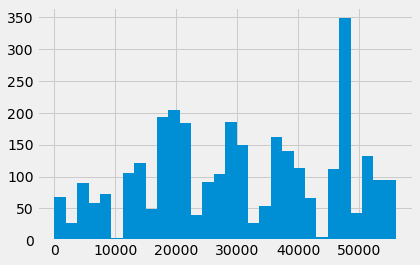

In [24]:
df[' FIPS'].hist(bins=30)

<AxesSubplot:xlabel=' FIPS', ylabel='Density'>

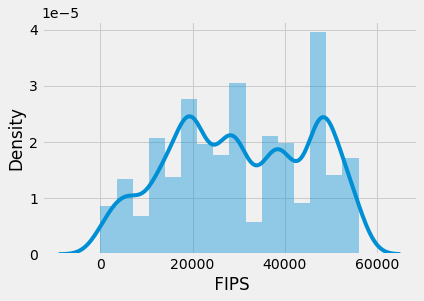

In [25]:
sns.distplot(df[' FIPS'])

((array([-3.51406443, -3.27112899, -3.13682913, ...,  3.13682913,
          3.27112899,  3.51406443]),
  array([    0,  1001,  1003, ..., 56041, 56043, 56045], dtype=int64)),
 (14856.948499532407, 30392.2817574021, 0.979291516274867))

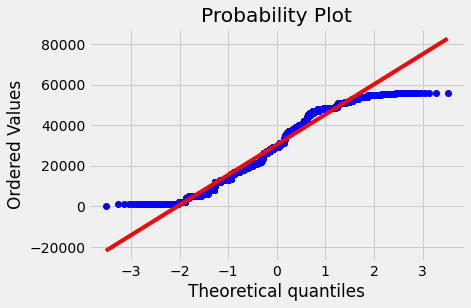

In [26]:
stats.probplot(df[' FIPS'], dist='norm', plot=plt)

BIVARIATE ANALYSIS

<AxesSubplot:xlabel='County', ylabel='count'>

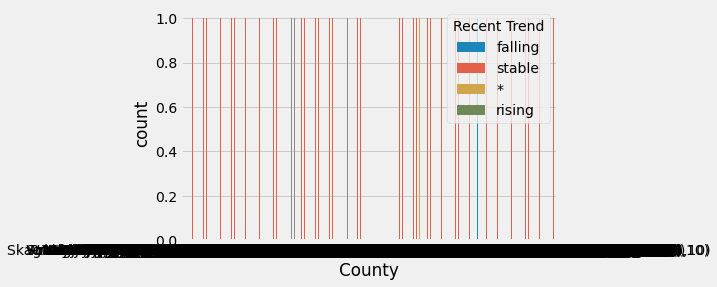

In [27]:
sns.countplot(df['County'], hue=df['Recent Trend']) 

In [28]:
#sns.countplot(df['County'], hue=df['Lower 95% Confidence Interval.1']) 

In [29]:
#sns.countplot(df['County'], hue=df['Upper 95% Confidence Interval.1'])

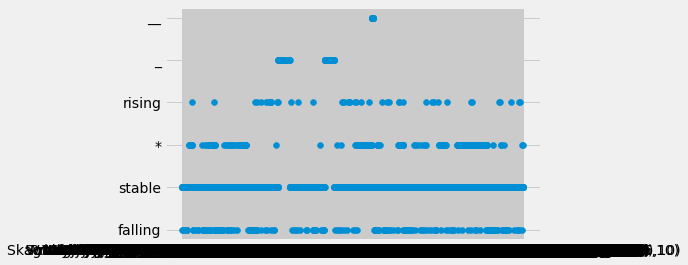

In [30]:
plt.scatter(df['County'], df['Recent Trend'])

MULTIVARIATE ANALYSIS

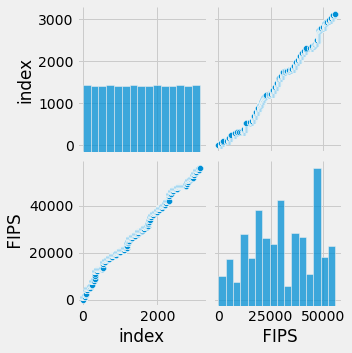

In [31]:
sns.pairplot(df)

In [32]:
df3 = df1.copy()
df3.head()

,index,County,FIPS,"Age-Adjusted Incidence Rate(Ê) - cases per 100,000",Lower 95% Confidence Interval,Upper 95% Confidence Interval,Average Annual Count,Recent Trend,Recent 5-Year Trend (ˆ) in Incidence Rates,Lower 95% Confidence Interval.1,Upper 95% Confidence Interval.1,Recent Trend1
0,0,"US (SEER+NPCR)(1,10)",0,62.4,62.3,62.6,214614,falling,-2.5,-3,-2,1
1,1,"Autauga County, Alabama(6,10)",1001,74.9,65.1,85.7,43,stable,0.5,-14.9,18.6,0
2,2,"Baldwin County, Alabama(6,10)",1003,66.9,62.4,71.7,170,stable,3,-10.2,18.3,0
3,3,"Barbour County, Alabama(6,10)",1005,74.6,61.8,89.4,25,stable,-6.4,-18.3,7.3,0
4,4,"Bibb County, Alabama(6,10)",1007,86.4,71,104.2,23,stable,-4.5,-31.4,32.9,0


In [33]:
df3['County'] = df1['County'].str.split('County').str[0].str.strip()

In [34]:
df3.head()

,index,County,FIPS,"Age-Adjusted Incidence Rate(Ê) - cases per 100,000",Lower 95% Confidence Interval,Upper 95% Confidence Interval,Average Annual Count,Recent Trend,Recent 5-Year Trend (ˆ) in Incidence Rates,Lower 95% Confidence Interval.1,Upper 95% Confidence Interval.1,Recent Trend1
0,0,"US (SEER+NPCR)(1,10)",0,62.4,62.3,62.6,214614,falling,-2.5,-3,-2,1
1,1,Autauga,1001,74.9,65.1,85.7,43,stable,0.5,-14.9,18.6,0
2,2,Baldwin,1003,66.9,62.4,71.7,170,stable,3,-10.2,18.3,0
3,3,Barbour,1005,74.6,61.8,89.4,25,stable,-6.4,-18.3,7.3,0
4,4,Bibb,1007,86.4,71,104.2,23,stable,-4.5,-31.4,32.9,0


In [35]:
df3['State'] = df1['County'].str.split('County,').str[1].str.strip()
df3['Province'] = df3['State'].str.split('(').str[1].str.strip()
df3['State'] = df3['State'].str.split('(').str[0].str.strip()
df3['Province'] = df3['Province'].str.split(')').str[0].str.strip()

In [36]:
df3.head()

,index,County,FIPS,"Age-Adjusted Incidence Rate(Ê) - cases per 100,000",Lower 95% Confidence Interval,Upper 95% Confidence Interval,Average Annual Count,Recent Trend,Recent 5-Year Trend (ˆ) in Incidence Rates,Lower 95% Confidence Interval.1,Upper 95% Confidence Interval.1,Recent Trend1,State,Province
0,0,"US (SEER+NPCR)(1,10)",0,62.4,62.3,62.6,214614,falling,-2.5,-3,-2,1,NaN,NaN
1,1,Autauga,1001,74.9,65.1,85.7,43,stable,0.5,-14.9,18.6,0,Alabama,"6,10"
2,2,Baldwin,1003,66.9,62.4,71.7,170,stable,3,-10.2,18.3,0,Alabama,"6,10"
3,3,Barbour,1005,74.6,61.8,89.4,25,stable,-6.4,-18.3,7.3,0,Alabama,"6,10"
4,4,Bibb,1007,86.4,71,104.2,23,stable,-4.5,-31.4,32.9,0,Alabama,"6,10"


In [37]:
df3.columns

Index(['index', 'County', ' FIPS',
       'Age-Adjusted Incidence Rate(Ê) - cases per 100,000',
       'Lower 95% Confidence Interval', 'Upper 95% Confidence Interval',
       'Average Annual Count', 'Recent Trend',
       'Recent 5-Year Trend (ˆ) in Incidence Rates',
       'Lower 95% Confidence Interval.1', 'Upper 95% Confidence Interval.1',
       'Recent Trend1', 'State', 'Province'],
      dtype='object')

In [38]:
order = ['index', 'County', 'State', 'Province', ' FIPS',
       'Age-Adjusted Incidence Rate(Ê) - cases per 100,000',
       'Lower 95% Confidence Interval', 'Upper 95% Confidence Interval',
       'Average Annual Count', 'Recent Trend', 'Recent Trend1',
       'Recent 5-Year Trend (ˆ) in Incidence Rates',
       'Lower 95% Confidence Interval.1', 'Upper 95% Confidence Interval.1']

In [39]:
df3 = df3[order]
df3.head()

,index,County,State,Province,FIPS,"Age-Adjusted Incidence Rate(Ê) - cases per 100,000",Lower 95% Confidence Interval,Upper 95% Confidence Interval,Average Annual Count,Recent Trend,Recent Trend1,Recent 5-Year Trend (ˆ) in Incidence Rates,Lower 95% Confidence Interval.1,Upper 95% Confidence Interval.1
0,0,"US (SEER+NPCR)(1,10)",NaN,NaN,0,62.4,62.3,62.6,214614,falling,1,-2.5,-3,-2
1,1,Autauga,Alabama,"6,10",1001,74.9,65.1,85.7,43,stable,0,0.5,-14.9,18.6
2,2,Baldwin,Alabama,"6,10",1003,66.9,62.4,71.7,170,stable,0,3,-10.2,18.3
3,3,Barbour,Alabama,"6,10",1005,74.6,61.8,89.4,25,stable,0,-6.4,-18.3,7.3
4,4,Bibb,Alabama,"6,10",1007,86.4,71,104.2,23,stable,0,-4.5,-31.4,32.9


In [40]:
df3['State'].unique()

array([nan, 'Alabama', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Maine',
       'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

In [41]:
df3[' FIPS'].unique()

array([    0,  1001,  1003, ..., 56041, 56043, 56045], dtype=int64)

In [42]:
df3['Province'].unique()

array([nan, '6,10', '7,8', '7,9', '7', '6'], dtype=object)

In [43]:
df4 = df3.drop(0)
df4.head()

,index,County,State,Province,FIPS,"Age-Adjusted Incidence Rate(Ê) - cases per 100,000",Lower 95% Confidence Interval,Upper 95% Confidence Interval,Average Annual Count,Recent Trend,Recent Trend1,Recent 5-Year Trend (ˆ) in Incidence Rates,Lower 95% Confidence Interval.1,Upper 95% Confidence Interval.1
1,1,Autauga,Alabama,"6,10",1001,74.9,65.1,85.7,43,stable,0,0.5,-14.9,18.6
2,2,Baldwin,Alabama,"6,10",1003,66.9,62.4,71.7,170,stable,0,3,-10.2,18.3
3,3,Barbour,Alabama,"6,10",1005,74.6,61.8,89.4,25,stable,0,-6.4,-18.3,7.3
4,4,Bibb,Alabama,"6,10",1007,86.4,71,104.2,23,stable,0,-4.5,-31.4,32.9
5,5,Blount,Alabama,"6,10",1009,69.7,61.2,79,51,stable,0,-13.6,-27.8,3.4


In [44]:
df4['Province'].unique()

array(['6,10', nan, '7,8', '7,9', '7', '6'], dtype=object)

In [45]:
df3['State'].unique()

array([nan, 'Alabama', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Maine',
       'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

In [46]:
df4['Province'] = df4['Province'].ffill()

In [47]:
df4.head()

,index,County,State,Province,FIPS,"Age-Adjusted Incidence Rate(Ê) - cases per 100,000",Lower 95% Confidence Interval,Upper 95% Confidence Interval,Average Annual Count,Recent Trend,Recent Trend1,Recent 5-Year Trend (ˆ) in Incidence Rates,Lower 95% Confidence Interval.1,Upper 95% Confidence Interval.1
1,1,Autauga,Alabama,"6,10",1001,74.9,65.1,85.7,43,stable,0,0.5,-14.9,18.6
2,2,Baldwin,Alabama,"6,10",1003,66.9,62.4,71.7,170,stable,0,3,-10.2,18.3
3,3,Barbour,Alabama,"6,10",1005,74.6,61.8,89.4,25,stable,0,-6.4,-18.3,7.3
4,4,Bibb,Alabama,"6,10",1007,86.4,71,104.2,23,stable,0,-4.5,-31.4,32.9
5,5,Blount,Alabama,"6,10",1009,69.7,61.2,79,51,stable,0,-13.6,-27.8,3.4


In [48]:
df4['Province'].unique()

array(['6,10', '7,8', '7,9', '7', '6'], dtype=object)

In [49]:
df5 = pd.get_dummies(df4['State'], drop_first=True)
df5

,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,Hawaii,Idaho,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3136,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3137,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3138,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3139,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [50]:
df6 = pd.concat([df4, df5], axis=1)
df6

,index,County,State,Province,FIPS,"Age-Adjusted Incidence Rate(Ê) - cases per 100,000",Lower 95% Confidence Interval,Upper 95% Confidence Interval,Average Annual Count,Recent Trend,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
1,1,Autauga,Alabama,"6,10",1001,74.9,65.1,85.7,43,stable,...,0,0,0,0,0,0,0,0,0,0
2,2,Baldwin,Alabama,"6,10",1003,66.9,62.4,71.7,170,stable,...,0,0,0,0,0,0,0,0,0,0
3,3,Barbour,Alabama,"6,10",1005,74.6,61.8,89.4,25,stable,...,0,0,0,0,0,0,0,0,0,0
4,4,Bibb,Alabama,"6,10",1007,86.4,71,104.2,23,stable,...,0,0,0,0,0,0,0,0,0,0
5,5,Blount,Alabama,"6,10",1009,69.7,61.2,79,51,stable,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3136,3136,Sweetwater,Wyoming,"6,10",56037,39.9,30.5,51.1,14,stable,...,0,0,0,0,0,0,0,0,0,1
3137,3137,Teton,Wyoming,"6,10",56039,23.7,14.7,36.1,5,stable,...,0,0,0,0,0,0,0,0,0,1
3138,3138,Uinta,Wyoming,"6,10",56041,31.7,20.8,46.1,6,stable,...,0,0,0,0,0,0,0,0,0,1
3139,3139,Washakie,Wyoming,"6,10",56043,50,33.8,72.2,6,stable,...,0,0,0,0,0,0,0,0,0,1


In [51]:
b2 = df6.apply(lb.fit_transform)

In [52]:
df6['Province1'] = df6['Province'].map({'6,10':0, '7,8':1, '7,9':2, '7':3, '6':4})

In [53]:
df6

,index,County,State,Province,FIPS,"Age-Adjusted Incidence Rate(Ê) - cases per 100,000",Lower 95% Confidence Interval,Upper 95% Confidence Interval,Average Annual Count,Recent Trend,...,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming,Province1
1,1,Autauga,Alabama,"6,10",1001,74.9,65.1,85.7,43,stable,...,0,0,0,0,0,0,0,0,0,0
2,2,Baldwin,Alabama,"6,10",1003,66.9,62.4,71.7,170,stable,...,0,0,0,0,0,0,0,0,0,0
3,3,Barbour,Alabama,"6,10",1005,74.6,61.8,89.4,25,stable,...,0,0,0,0,0,0,0,0,0,0
4,4,Bibb,Alabama,"6,10",1007,86.4,71,104.2,23,stable,...,0,0,0,0,0,0,0,0,0,0
5,5,Blount,Alabama,"6,10",1009,69.7,61.2,79,51,stable,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3136,3136,Sweetwater,Wyoming,"6,10",56037,39.9,30.5,51.1,14,stable,...,0,0,0,0,0,0,0,0,1,0
3137,3137,Teton,Wyoming,"6,10",56039,23.7,14.7,36.1,5,stable,...,0,0,0,0,0,0,0,0,1,0
3138,3138,Uinta,Wyoming,"6,10",56041,31.7,20.8,46.1,6,stable,...,0,0,0,0,0,0,0,0,1,0
3139,3139,Washakie,Wyoming,"6,10",56043,50,33.8,72.2,6,stable,...,0,0,0,0,0,0,0,0,1,0


In [54]:
df7 = df6.drop(['County', 'State', 'Province', 'Recent Trend'], axis = 1)
df7.head()

,index,FIPS,"Age-Adjusted Incidence Rate(Ê) - cases per 100,000",Lower 95% Confidence Interval,Upper 95% Confidence Interval,Average Annual Count,Recent Trend1,Recent 5-Year Trend (ˆ) in Incidence Rates,Lower 95% Confidence Interval.1,Upper 95% Confidence Interval.1,...,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming,Province1
1,1,1001,74.9,65.1,85.7,43,0,0.5,-14.9,18.6,...,0,0,0,0,0,0,0,0,0,0
2,2,1003,66.9,62.4,71.7,170,0,3,-10.2,18.3,...,0,0,0,0,0,0,0,0,0,0
3,3,1005,74.6,61.8,89.4,25,0,-6.4,-18.3,7.3,...,0,0,0,0,0,0,0,0,0,0
4,4,1007,86.4,71,104.2,23,0,-4.5,-31.4,32.9,...,0,0,0,0,0,0,0,0,0,0
5,5,1009,69.7,61.2,79,51,0,-13.6,-27.8,3.4,...,0,0,0,0,0,0,0,0,0,0


In [55]:
df7.columns

Index(['index', ' FIPS', 'Age-Adjusted Incidence Rate(Ê) - cases per 100,000',
       'Lower 95% Confidence Interval', 'Upper 95% Confidence Interval',
       'Average Annual Count', 'Recent Trend1',
       'Recent 5-Year Trend (ˆ) in Incidence Rates',
       'Lower 95% Confidence Interval.1', 'Upper 95% Confidence Interval.1',
       'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut',
       'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois',
       'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri',
       'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey',
       'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio',
       'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia',
       'Washington', 'West Virginia', 'Wisconsin', 'Wyoming', 'Province1'],
     

In [56]:
df7[' FIPS'].unique()

array([ 1001,  1003,  1005, ..., 56041, 56043, 56045], dtype=int64)

In [57]:
df8 = df7.copy()

In [58]:
df8['Age-Adjusted Incidence Rate(Ê) - cases per 100,000'].unique()

array(['74.9', '66.9', '74.6', '86.4', '69.7', '65.8', '58.3', '84.2',
       '75.4', '82.4', '73.9', '49.2', '69.5', '83.3', '71.5', '75.9',
       '73.5', '82.6', '83', '61.5', '69.6', '76.7', '76.2', '60.8',
       '78.1', '75.5', '81.9', '77.3', '72.4', '90.3', '87.9', '71',
       '66.5', '70.8', '80.9', '65.1', '80.4', '69.3', '88.1', '59.4',
       '73.4', '57.6', '57.9', '64.8', '61.6', '74.2', '79.4', '62.3',
       '61', '83.1', '65.6', '61.8', '78.7', '74.7', '57.1', '55.5', '74',
       '70.5', '72.3', '98.3', '74.8', '73.2', '90.8', '* ', '62.7',
       '58.1', '35.1', '64.9', '88.3', '103.6', '153.4', '67.6', '81.4',
       '44', '76.8', '66.1', '78.8', '22.9', '46.9', '36.7', '54.3',
       '45.5', '64', '54.4', '52.2', '76.6', '39.6', '50.9', '36.1',
       '51.9', '48', '85.9', '77', '85.6', '56.4', '67.7', '86.3', '82.5',
       '59.1', '76.4', '71.6', '108.7', '83.6', '77.5', '72', '75',
       '79.1', '75.6', '82.2', '79.2', '77.1', '64.7', '80.6', '96.1',
       '8

In [59]:
df8['Age-Adjusted Incidence Rate(Ê) - cases per 100,000'] = df8['Age-Adjusted Incidence Rate(Ê) - cases per 100,000'].str.strip("#  ")

In [60]:
df8['Age-Adjusted Incidence Rate(Ê) - cases per 100,000'] = df8['Age-Adjusted Incidence Rate(Ê) - cases per 100,000'].str.strip("__")

In [61]:
df8['Age-Adjusted Incidence Rate(Ê) - cases per 100,000'] = df8['Age-Adjusted Incidence Rate(Ê) - cases per 100,000'].str.strip("* ")

In [62]:
df8['Age-Adjusted Incidence Rate(Ê) - cases per 100,000'] = df8['Age-Adjusted Incidence Rate(Ê) - cases per 100,000'].str.strip(" ")

In [63]:
df8['Age-Adjusted Incidence Rate(Ê) - cases per 100,000'].unique()

array(['74.9', '66.9', '74.6', '86.4', '69.7', '65.8', '58.3', '84.2',
       '75.4', '82.4', '73.9', '49.2', '69.5', '83.3', '71.5', '75.9',
       '73.5', '82.6', '83', '61.5', '69.6', '76.7', '76.2', '60.8',
       '78.1', '75.5', '81.9', '77.3', '72.4', '90.3', '87.9', '71',
       '66.5', '70.8', '80.9', '65.1', '80.4', '69.3', '88.1', '59.4',
       '73.4', '57.6', '57.9', '64.8', '61.6', '74.2', '79.4', '62.3',
       '61', '83.1', '65.6', '61.8', '78.7', '74.7', '57.1', '55.5', '74',
       '70.5', '72.3', '98.3', '74.8', '73.2', '90.8', '', '62.7', '58.1',
       '35.1', '64.9', '88.3', '103.6', '153.4', '67.6', '81.4', '44',
       '76.8', '66.1', '78.8', '22.9', '46.9', '36.7', '54.3', '45.5',
       '64', '54.4', '52.2', '76.6', '39.6', '50.9', '36.1', '51.9', '48',
       '85.9', '77', '85.6', '56.4', '67.7', '86.3', '82.5', '59.1',
       '76.4', '71.6', '108.7', '83.6', '77.5', '72', '75', '79.1',
       '75.6', '82.2', '79.2', '77.1', '64.7', '80.6', '96.1', '89.2',
   

In [64]:
df8['Lower 95% Confidence Interval'] = pd.to_numeric(df8['Lower 95% Confidence Interval'], errors='coerce', downcast='float')


In [65]:
df8['Age-Adjusted Incidence Rate(Ê) - cases per 100,000'] = pd.to_numeric(df8['Age-Adjusted Incidence Rate(Ê) - cases per 100,000'], errors='coerce', downcast='float')

In [66]:
df8['Upper 95% Confidence Interval'] = pd.to_numeric(df8['Upper 95% Confidence Interval'], errors='coerce', downcast='float')

In [67]:
df8['Average Annual Count'] = pd.to_numeric(df8['Average Annual Count'], errors='coerce', downcast='float')

In [68]:
df8['Recent 5-Year Trend (ˆ) in Incidence Rates'] = pd.to_numeric(df8['Recent 5-Year Trend (ˆ) in Incidence Rates'], errors='coerce', downcast='float')

In [69]:
df8['Lower 95% Confidence Interval.1'] = pd.to_numeric(df8['Lower 95% Confidence Interval.1'], errors='coerce', downcast='float')

In [70]:
df8['Upper 95% Confidence Interval.1'] = pd.to_numeric(df8['Upper 95% Confidence Interval.1'], errors='coerce', downcast='float')

In [71]:
df8['Lower 95% Confidence Interval'] = df8['Lower 95% Confidence Interval'].ffill()

In [72]:
df8['Age-Adjusted Incidence Rate(Ê) - cases per 100,000'] = df8['Age-Adjusted Incidence Rate(Ê) - cases per 100,000'].ffill()

In [73]:
df8['Upper 95% Confidence Interval'] = df8['Upper 95% Confidence Interval'].ffill()

In [74]:
df8['Average Annual Count'] = df8['Average Annual Count'].ffill()

In [75]:
df8['Recent 5-Year Trend (ˆ) in Incidence Rates'] = df8['Recent 5-Year Trend (ˆ) in Incidence Rates'].ffill()

In [76]:
df8['Lower 95% Confidence Interval.1'] = df8['Lower 95% Confidence Interval.1'].ffill()

In [77]:
df8['Upper 95% Confidence Interval.1'] = df8['Upper 95% Confidence Interval.1'].ffill()

In [78]:
df8['Lower 95% Confidence Interval'].unique()

array([ 65.1,  62.4,  61.8,  71. ,  61.2,  47.3,  46.4,  77.5,  64.4,
        69.8,  63.7,  36.3,  57.3,  65.8,  58.1,  62.3,  67.2,  57.1,
        63.9,  72.3,  46.3,  62.6,  66.7,  65.6,  53.5,  69.7,  64.8,
        75.1,  60.7,  77.2,  65. ,  55. ,  52.7,  64.2,  71.7,  62.5,
        64. ,  62.9,  75.6,  53.2,  65.7,  41.1,  45.3,  61.1,  49.3,
        63.1,  72.1,  71.9,  50.2,  56.5,  74. ,  52.8,  50.5,  62.2,
        68.8,  67.1,  52.2,  40.5,  66.5,  61. ,  66.9,  89.2,  58.9,
        54.4,  76.9,  40.3,  49.1,  24.8,  55.4,  48.8,  60.6,  68.4,
        95.2,  37.1,  48.2,  26.6,  48.1,  51.9,  33.2,  18.1,  42.5,
        31.5,  47.7,  36. ,  44.1,  51.2,  72.6,  34.5,  42.7,  29. ,
        48.6,  70.1,  63.3,  76.4,  52.1,  58. ,  66.3,  56.2,  48.9,
        58.3,  57.8,  90.6,  72. ,  56.6,  58.8,  61.4,  70. ,  64.9,
        62. ,  60.1,  49.4,  74.2,  78.1,  77.8,  48.4,  81.6,  76.2,
        70.9,  43.1,  86.5,  88.3,  81.9,  73.9,  85.3,  40.2,  46.7,
        72.9,  81.8,

In [79]:
df8['Age-Adjusted Incidence Rate(Ê) - cases per 100,000'].unique()

array([ 74.9,  66.9,  74.6,  86.4,  69.7,  65.8,  58.3,  84.2,  75.4,
        82.4,  73.9,  49.2,  69.5,  83.3,  71.5,  75.9,  73.5,  82.6,
        83. ,  61.5,  69.6,  76.7,  76.2,  60.8,  78.1,  75.5,  81.9,
        77.3,  72.4,  90.3,  87.9,  71. ,  66.5,  70.8,  80.9,  65.1,
        80.4,  69.3,  88.1,  59.4,  73.4,  57.6,  57.9,  64.8,  61.6,
        74.2,  79.4,  62.3,  61. ,  83.1,  65.6,  61.8,  78.7,  74.7,
        57.1,  55.5,  74. ,  70.5,  72.3,  98.3,  74.8,  73.2,  90.8,
        62.7,  58.1,  35.1,  64.9,  88.3, 103.6, 153.4,  67.6,  81.4,
        44. ,  76.8,  66.1,  78.8,  22.9,  46.9,  36.7,  54.3,  45.5,
        64. ,  54.4,  52.2,  76.6,  39.6,  50.9,  36.1,  51.9,  48. ,
        85.9,  77. ,  85.6,  56.4,  67.7,  86.3,  82.5,  59.1,  76.4,
        71.6, 108.7,  83.6,  77.5,  72. ,  75. ,  79.1,  75.6,  82.2,
        79.2,  77.1,  64.7,  80.6,  96.1,  89.2,  60.6,  94.2,  96.2,
        82.3,  55.9, 104.4,  97.5,  97.2,  98.1, 102.7,  57. ,  63.4,
        79.5,  87. ,

In [80]:
from sklearn.model_selection import train_test_split

inputs = df8.drop(["Recent Trend1"], axis=1)
target = df8["Recent Trend1"]

In [81]:
#Scale the data 

from sklearn.preprocessing import StandardScaler

#Create a scaler object
scaler = StandardScaler()

#Fit the inputs (calculate the mean and standard deviation feature-wise)
scaler.fit(inputs)

#Scale the features and store them in a new variable (the actual scaling procedure)
inputs_scaled = scaler.transform(inputs)

In [82]:
x_train, x_test, y_train, y_test = train_test_split( inputs_scaled, target, test_size=0.2, random_state=0)

In [83]:
x_train.shape

(2512, 57)

In [84]:
x_test.shape

(628, 57)

In [85]:
from imblearn.over_sampling import SMOTE

In [86]:
sm = SMOTE(random_state=2)
x_train_res, y_train_res = sm.fit_resample(x_train, y_train)

<AxesSubplot:xlabel='Recent Trend1', ylabel='count'>

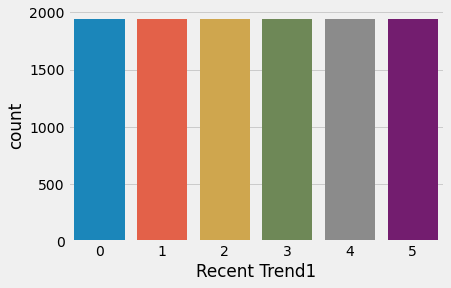

In [87]:
sns.countplot(y_train_res)

HANDLING OUTLIERS

<AxesSubplot:xlabel='index'>

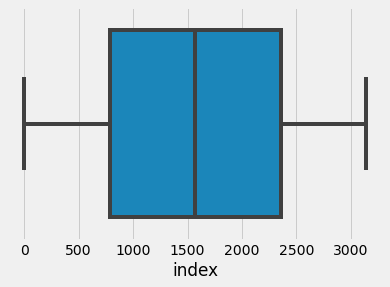

In [88]:
sns.boxplot(x=df['index'])

<AxesSubplot:xlabel=' FIPS'>

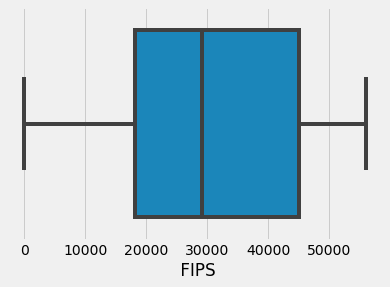

In [89]:
sns.boxplot(x=df[' FIPS'])

In [90]:
    classifier_tree = DecisionTreeClassifier(criterion = 'entropy', random_state=0)
    classifier_tree.fit(x_train_res, y_train_res)
    
    y_pred = classifier_tree.predict(x_test)
    
    cm = confusion_matrix(y_test, y_pred)
    
    print(f"Train score : {classifier_tree.score(x_train_res, y_train_res)}\nTest Score : {classifier_tree.score(x_test, y_test)}"), print(cm)

Train score : 1.0
Test Score : 0.856687898089172
[[426   0  63   0   0   0]
 [  0  33   5   0   0   0]
 [ 19   0  26   1   0   0]
 [  0   0   2   4   0   0]
 [  0   0   0   0  45   0]
 [  0   0   0   0   0   4]]


(None, None)

In [91]:

    classifier_forest = RandomForestClassifier(criterion = 'entropy', random_state=0)
    classifier_forest.fit(x_train_res, y_train_res)
    
    y_pred = classifier_forest.predict(x_test)
    
    cm = confusion_matrix(y_test, y_pred)
    
    print(f"Train score : {classifier_forest.score(x_train_res, y_train_res)}\nTest Score : {classifier_forest.score(x_test, y_test)}"), print(cm)

Train score : 1.0
Test Score : 0.8630573248407644
[[434   0  55   0   0   0]
 [  0  33   5   0   0   0]
 [ 23   0  22   1   0   0]
 [  0   0   2   4   0   0]
 [  0   0   0   0  45   0]
 [  0   0   0   0   0   4]]


(None, None)

In [92]:
    classifier_knn = KNeighborsClassifier(metric = 'minkowski', p = 2)
    classifier_knn.fit(x_train_res, y_train_res)
    
    y_pred = classifier_knn.predict(x_test)
    
    cm = confusion_matrix(y_test, y_pred)
    
    print(f"Train score : {classifier_knn.score(x_train_res, y_train_res)}\nTest Score : {classifier_knn.score(x_test, y_test)}"), print(cm)

Train score : 0.9617697594501718
Test Score : 0.7292993630573248
[[360  38  85   6   0   0]
 [ 14  19   5   0   0   0]
 [ 15   1  28   2   0   0]
 [  2   0   1   3   0   0]
 [  0   0   0   0  45   0]
 [  1   0   0   0   0   3]]


(None, None)

In [93]:
    from sklearn import svm
    classifier_svm = svm.SVC(kernel = 'rbf', random_state=0)
    classifier_svm.fit(x_train_res, y_train_res)
    
    y_pred = classifier_svm.predict(x_test)
    
    cm = confusion_matrix(y_test, y_pred)
    
    print(f"Train score : {classifier_svm.score(x_train_res, y_train_res)}\nTest Score : {classifier_svm.score(x_test, y_test)}"), print(cm)

Train score : 0.9265463917525774
Test Score : 0.7070063694267515
[[333  43  97  16   0   0]
 [  6  26   6   0   0   0]
 [ 10   2  32   2   0   0]
 [  1   0   0   5   0   0]
 [  0   0   0   0  45   0]
 [  1   0   0   0   0   3]]


(None, None)

In [94]:
    classifier_naive = GaussianNB()
    classifier_naive.fit(x_train_res, y_train_res)
    
    y_pred = classifier_naive.predict(x_test)
    
    cm = confusion_matrix(y_test, y_pred)
    
    print(f"Train score : {classifier_naive.score(x_train_res, y_train_res)}\nTest Score : {classifier_naive.score(x_test, y_test)}"), print(cm)

Train score : 0.7275773195876288
Test Score : 0.21656050955414013
[[ 31  63 200 195   0   0]
 [  0  11  12  15   0   0]
 [  0   2  43   1   0   0]
 [  0   0   3   3   0   0]
 [  0   0   0   0  45   0]
 [  0   0   1   0   0   3]]


(None, None)

In [95]:
inputs.columns

Index(['index', ' FIPS', 'Age-Adjusted Incidence Rate(Ê) - cases per 100,000',
       'Lower 95% Confidence Interval', 'Upper 95% Confidence Interval',
       'Average Annual Count', 'Recent 5-Year Trend (ˆ) in Incidence Rates',
       'Lower 95% Confidence Interval.1', 'Upper 95% Confidence Interval.1',
       'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut',
       'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois',
       'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri',
       'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey',
       'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio',
       'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia',
       'Washington', 'West Virginia', 'Wisconsin', 'Wyoming', 'Province1'],
      dtype='object')

In [96]:
inputs.shape

(3140, 57)

In [97]:
classifier_forest.predict([[5, 1798.0, 87.0, 55.0, 122.0, 218.0, 1.413524, 1.405320, 218.0, 223.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4 ]])


array([3], dtype=int64)

In [98]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
cross_val_score(classifier_forest, inputs_scaled, target, cv= 5)

array([0.87898089, 0.92197452, 0.77388535, 0.86305732, 0.33598726])

In [99]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
cross_val_score(classifier_tree, inputs_scaled, target, cv= 5)

array([0.22770701, 0.88853503, 0.7611465 , 0.78980892, 0.22292994])

In [100]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
cross_val_score(classifier_knn, inputs_scaled, target, cv= 5)

array([0.57802548, 0.57006369, 0.70063694, 0.68152866, 0.6066879 ])

In [101]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
cross_val_score(classifier_svm, inputs_scaled, target, cv= 5)

array([0.62738854, 0.61464968, 0.52070064, 0.65127389, 0.60191083])

In [102]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
cross_val_score(classifier_naive, inputs_scaled, target, cv= 5)

array([0.14490446, 0.12579618, 0.10987261, 0.17356688, 0.1544586 ])

In [103]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

In [104]:
def find_best_model_using_gridsearchcv(inputs_scaled, target):
    algos = {
        'svm' : {
            'model': svm.SVC(),
            'params': {
                'gamma': [0.1, 1, 10],
                'kernel': ['linear', 'rbf']
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeClassifier(),
            'params': {
                'min_samples_leaf': [1, 2, 3],
                'max_features': ['auto', 'sqrt', 'log2'],
                'criterion': ['gini', 'entropy']
            }
        },   
         'random_forest': {
            'model': RandomForestClassifier(),
            'params': {
                'n_estimators': [100, 200, 300],
                'max_depth': [3, 5, 7],
                'min_samples_split': [2, 5, 10]
            }   
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(inputs_scaled, target)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(inputs_scaled, target)

,model,best_score,best_params
0,svm,0.905732,"{'gamma': 0.1, 'kernel': 'linear'}"
1,lasso,-0.000834,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.901592,"{'criterion': 'entropy', 'max_features': 'sqrt..."
3,random_forest,0.930255,"{'max_depth': 7, 'min_samples_split': 5, 'n_es..."


In [105]:
import pickle
pickle.dump(classifier_forest, open('randomforestmodel.pkl', 'wb'))
pickled_model = pickle.load(open('randomforestmodel.pkl', 'rb'))

In [127]:
a = pickled_model.predict([[20, 1798.0, 87.0, 55.0, 122.0, 218.0, 1.413524, 1.405320, 218.0, 223.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2 ]])
pickle = int(a)
pickle

3

In [107]:
from sklearn import metrics

In [108]:
y_pred = np.around(pickled_model.predict(x_test))
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.89      0.92       489
           1       1.00      0.87      0.93        38
           2       0.26      0.48      0.34        46
           3       0.80      0.67      0.73         6
           4       1.00      1.00      1.00        45
           5       1.00      1.00      1.00         4

    accuracy                           0.86       628
   macro avg       0.84      0.82      0.82       628
weighted avg       0.90      0.86      0.88       628



In [111]:
pickled_model.score(x_test, y_test)

0.8630573248407644

In [112]:
pickled_model.score(x_train, y_train)

1.0

In [120]:
import pickle
with open('lb.pkl', 'wb') as file:
    pickle.dump(lb, file)

In [121]:
import pickle
with open('lbProv.pkl', 'wb') as file:
    pickle.dump(b2, file)

In [123]:
file_path = "C://Users//Jayalakshmi//Documents//CSV files//NMdf6.csv"
df6.to_csv(file_path, index=False)

In [126]:
file_path = "C://Users//Jayalakshmi//Documents//CSV files//NMinputs.csv"
inputs.to_csv(file_path, index=False)